In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def metaphlan_subtype(meta_df,subtype_df,genus,species_col,group_col) :

    subtype_dict = dict()
    for i in range(subtype_df.shape[0]) :
        s = subtype_df[species_col][i]
        #s = 's__' +s.replace(' ','_')
        type = subtype_df[group_col][i]
        if type == 'no phylogroup' :
            type = genus + '_others'
        else :
            type = type + '_' + 'subtype'
        
        subtype_dict[s] = type  

    idx = [bool(re.search(genus,x)) for x in meta_df.index]
    df = meta_df.loc[idx,:]

    idx = list()
    ## change species name to subtype name
    convert_dict = dict()
    for i in range(df.shape[0]) :
        if df.index[i] in subtype_dict.keys() :
            s = df.index[i]
            subtype = subtype_dict[s]
        elif df.index[i] == 's__Lactobacillus_casei_paracasei' :
            s = df.index[i]
            subtype = 'Lacticaseibacillus_subtype'
        else :
            s = df.index[i]
            subtype = genus + '_others'

        if subtype in convert_dict.keys() :
            convert_dict[subtype] = convert_dict[subtype] + [s]
        else :
            convert_dict[subtype] = [s]
        idx.append(subtype)

    df.index = idx
    meta_df = df.copy()
    meta_df['subtype'] = df.index
    meta_df = meta_df.groupby('subtype').agg('sum')
    meta_df.index.name = None

    return meta_df,convert_dict

In [71]:
df  = pd.read_csv("/home/bruce1996/data/MCI/metaphlan_result/formated_metaphlan_table.txt",sep = '\t',index_col=0)
metadata = pd.read_csv("/home/bruce1996/data/MCI/metadata/TPMIC_diagnosis_1121.csv",index_col=0)

In [91]:
import re

def seperate_abundance_matrix(matrix,metadata,condition,target,output_path) :
    
    idx = np.where(metadata[condition] == target,True,False)
    sample = list(metadata.index[idx])
    sub_matrix = matrix.loc[:,sample]
    lacto_idx = [bool(re.search('Lactobacillus',x)) for x in sub_matrix.index]
    bifido_idx = [bool(re.search('Bifidobacterium',x)) for x in sub_matrix.index]
    sub_matrix.loc[lacto_idx,:].to_csv(output_path + 'lactobacillus_matrix.txt',sep='\t')
    sub_matrix.loc[bifido_idx,:].to_csv(output_path + 'bifidobacterium_matrix.txt',sep='\t')
    sub_matrix.to_csv(output_path + 'abundance_matrix.txt',sep='\t')
    

In [93]:
seperate_abundance_matrix(df,metadata,'Diagnosis','MCI',"/home/bruce1996/data/MCI/manuscript/MCI/abundance_matrix/")

In [4]:
import re
normal_l_df = pd.read_csv("/home/bruce1996/data/MCI/manuscript/normal/abundance_matrix/lactobacillus_matrix.txt",sep = '\t',index_col=0)
l_subtype_df = pd.read_csv('~/data/MCI/subtyping/Lactobacillus_group.csv')
l_df,l_d = metaphlan_subtype(normal_l_df,l_subtype_df,'Lactobacillus','species','phylogroup')

In [9]:
abundance_matrix = pd.concat([normal_l_df,l_df])

In [10]:
abundance_matrix

,TPMIC01030,TPMIC01031,TPMIC01032,TPMIC01033,TPMIC01035,TPMIC01036,TPMIC01037,TPMIC01038,TPMIC01039,TPMIC01040,...,TPMIC03045,TPMIC03049,TPMIC03066,TPMIC03070,TPMIC03072,TPMIC03083,TPMIC03084,TPMIC03100,TPMIC03103,TPMIC03108
Lactobacillus acidophilus,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0000,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
Lactobacillus amylovorus,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0000,0.0,0.0,1.43928,...,0.0000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
Lactobacillus brevis,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0000,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
Lactobacillus casei paracasei,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0000,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
Lactobacillus coryniformis,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0000,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
Lactobacillus crispatus,0.0,0.0,0.00000,0.0,0.00048,0.0,0.0000,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.02093,0.0
Lactobacillus curvatus,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0000,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
Lactobacillus delbrueckii,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0000,0.0,0.0,0.00000,...,0.0011,0.0,0.0,0.0,0.00114,0.0,5.84641,0.0,0.20220,0.0
Lactobacillus farciminis,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0000,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
Lactobacillus fermentum,0.0,0.0,0.00000,0.0,0.05107,0.0,0.0000,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.12379,0.0


In [13]:
order_list = []
for subtype in l_d.keys() :
    subtype_order = [subtype] + l_d[subtype]
    order_list = order_list + subtype_order

In [14]:
order_list

['Lactobacillus_subtype',
 'Lactobacillus acidophilus',
 'Lactobacillus amylovorus',
 'Lactobacillus crispatus',
 'Lactobacillus delbrueckii',
 'Lactobacillus gasseri',
 'Lactobacillus iners',
 'Lactobacillus johnsonii',
 'Levilactobacillus_subtype',
 'Lactobacillus brevis',
 'Lactobacillus_others',
 'Lactobacillus casei paracasei',
 'Lactobacillus sp 7 1 47FAA',
 'Lactobacillus zeae',
 'Loigolactobacillus_subtype',
 'Lactobacillus coryniformis',
 'Latilactobacillus_subtype',
 'Lactobacillus curvatus',
 'Lactobacillus sakei',
 'Companilactobacillus_subtype',
 'Lactobacillus farciminis',
 'Limosilactobacillus_subtype',
 'Lactobacillus fermentum',
 'Lactobacillus mucosae',
 'Lactobacillus oris',
 'Lactobacillus reuteri',
 'Lactobacillus vaginalis',
 'Lactiplantibacillus_subtype',
 'Lactobacillus plantarum',
 'Lacticaseibacillus_subtype',
 'Lactobacillus rhamnosus',
 'Ligilactobacillus_subtype',
 'Lactobacillus ruminis',
 'Lactobacillus salivarius',
 'Fructilactobacillus_subtype',
 'Lacto

In [11]:
pv_lambda = lambda x : 100 * (sum(x > 0) / len(x))
pv = list(map(pv_lambda,abundance_matrix.to_numpy()))
mab = abundance_matrix.mean(axis=1)
med = abundance_matrix.median(axis=1)
df = pd.DataFrame({'Prevalence' : pv,'Mean_abundance' : mab},index=abundance_matrix.index)

In [16]:
df.loc[order_list,:].to_csv('/home/bruce1996/data/MCI/subtyping/candidate_species_prevalence_and_abundance.txt',sep='\t')

In [23]:
df.loc['Lactobacillus_subtype','Mean_abundance'] -  df.loc['Lactobacillus gasseri','Mean_abundance']

0.07043727941176471

In [22]:
df.loc['Limosilactobacillus_subtype','Mean_abundance'] -  df.loc['Lactobacillus fermentum','Mean_abundance']

0.016080808823529406

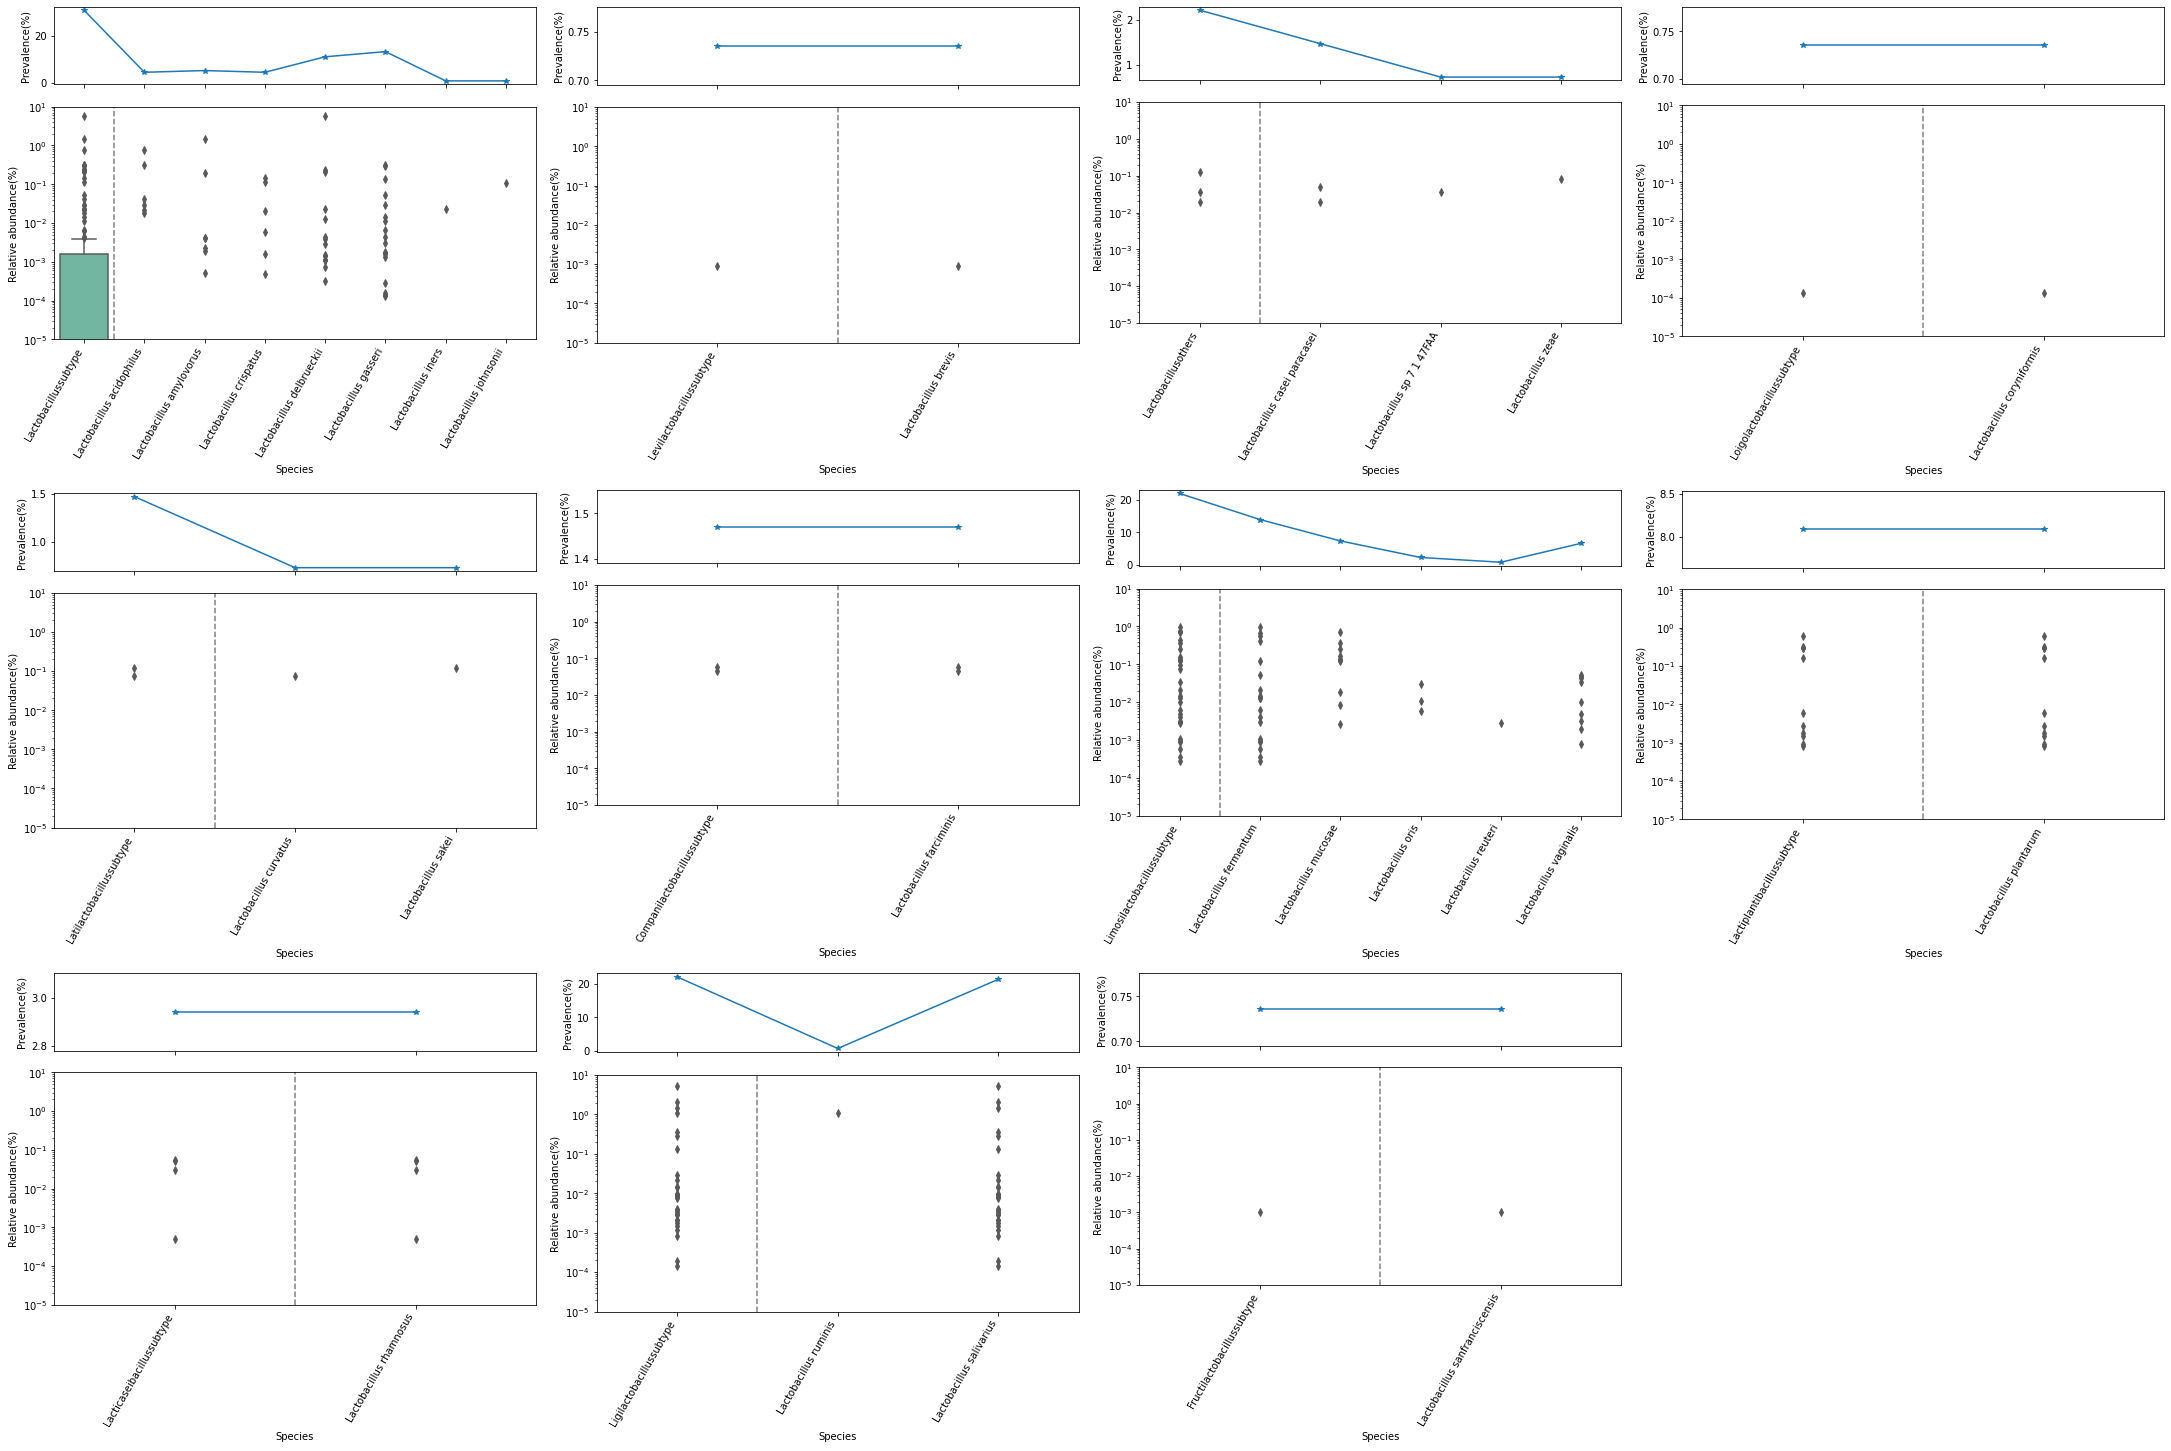

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(30, 20))

subfigs = fig.subfigures(3, 4)
subtypes = list(l_d.keys())
for idx, subfig in enumerate(subfigs.flat):
    if idx == 11 :
        break
    subtype = subtypes[idx]
    ###
    species = l_d[subtype]
    sub_matrix = abundance_matrix.loc[[subtype] + species,:]
    sub_matrix_pv = list(map(pv_lambda,sub_matrix.to_numpy()))
    sub_matrix['Species'] = [x.replace('_','') for x in sub_matrix.index]
    sub_m = sub_matrix.melt(id_vars='Species')
    
    axs = subfig.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1, 3]})
    for nn, ax in enumerate(axs):
        if nn == 0 :
            ax.plot(sub_matrix_pv,marker = '*')
            ax.set_ylabel('Prevalence(%)')
        else :
            sns.boxplot(data=sub_m,x='Species',y='value',palette='Set2',ax=ax)
            ax.set_xticklabels(sub_m['Species'].unique(), rotation=60, ha='right')
            ax.set_yscale("log")
            ax.set_ylabel("Relative abundance(%)")
            ax.set_ylim([10 ** -5,10])
            x = ax.get_xticks()[0]
            ax.axvline(x+.5,color='grey', linestyle='--')

plt.savefig("/home/bruce1996/data/MCI/manuscript/supplement_fig/fig_s3/subtype_box_chart.png",dpi=300,format = "png")
    

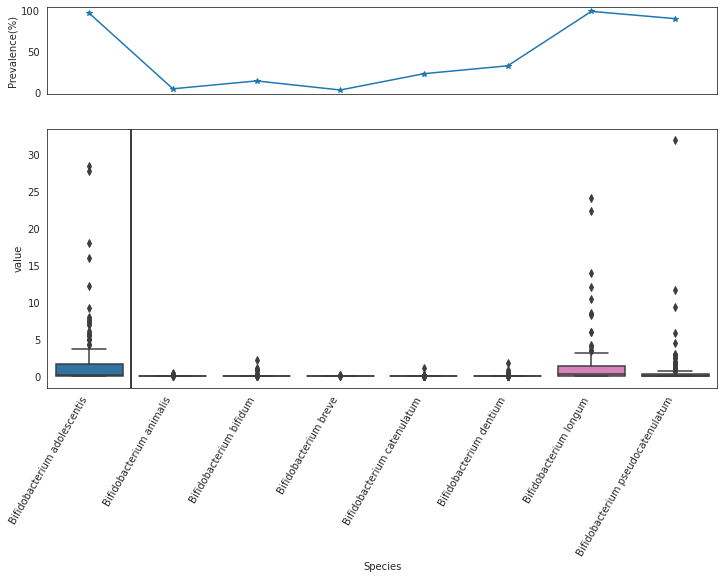

In [65]:
fig, axes = plt.subplots(2, 1, sharex=True,figsize=(12,7),gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(data=ab_m,x='Species',y='value',ax=axes[1],order=sorted(name))
axes[0].plot(pv,marker = '*')
axes[0].set_ylabel('Prevalence(%)')
axes[1].set_xticklabels(ab_m['Species'].unique(), rotation=60, ha='right')
x = axes[1].get_xticks()[0]
axes[1].axvline(x+.5,color='k')


In [ ]:
def abundance_prevalence_scatterplot(df,output_path,format='png',legend_position='auto') :
    
    pv_lambda = lambda x : 100 * (sum(x > 0) / len(x))
    pv = list(map(pv_lambda,df.to_numpy()))
    mab = df.mean(axis=1)
    plot_df = pd.DataFrame({'Species' : df.index,'Prevalence' : pv,'Mean abundance' : mab})
    plt.figure(figsize=(10,7))
    sns.scatterplot(data=plot_df,x='Prevalence',y = 'Mean abundance',hue='Species',palette='rainbow_r',s =100)
    plt.ylabel('Mean relative abundance(%)')
    if plot_df.shape[0] > 10 :
        legend_col = 2
    else :
        legend_col = 1
    if legend_position == 'auto' :
        plt.legend(ncol=legend_col)
    else :
        plt.legend(loc=legend_position,ncol=legend_col,bbox_to_anchor=(1, 0))
    
    if format == 'png' :
        plt.savefig(output_path,dpi = 300,bbox_inches='tight')
    else :
        plt.savefig(output_path,dpi = 300,bbox_inches='tight',format=format)

In [ ]:
output_dir = '/home/bruce1996/data/MCI/manuscript/normal/'
abundance_prevalence_scatterplot(l_df,output_dir + 'lactosubtype_prevalence_abundance_scatterplot.png',format='png',legend_position='lower right')

In [98]:
def subtype_lollipop_chart(origin_df,subtype_df,subtype_dict,output_path,fig_format) :
    '''
    origin_df : dataframe; row is species,columns is sample
    subtype_df : dataframe; row is subtype base on origin_df, columns is sample
    subtype_dict : dict; key is subtype,value is list contain species in subtype
    '''
    dominant_s = []
    for subtype in subtype_df.index :
        dominant_s.append(origin_df.loc[subtype_dict[subtype],:].mean(axis=1).sort_values().index[-1])
        
    dominant_df = origin_df.loc[dominant_s,:]
    ##
    pv_lambda = lambda x : 100 * (sum(x > 0) / len(x))
    abundance_diff = subtype_df.mean(axis=1).values - dominant_df.mean(axis=1).values
    subtype_pv = list(map(pv_lambda,subtype_df.to_numpy())) 
    species_pv = list(map(pv_lambda,dominant_df.to_numpy()))
    prevalence_diff = np.array(subtype_pv) - np.array(species_pv)
    plot_df = pd.DataFrame({'Abundance' : abundance_diff ,'Prevalence' :  prevalence_diff},index = [x.replace('_',' ') for x in subtype_df.index])
    
    
    f, (ax1, ax2) = plt.subplots(1, 2,figsize= (20,7))

    my_range=range(plot_df.shape[0])
    ### mean relative abundance
    ax1.hlines(y=my_range, xmin=[0] * plot_df.shape[0], xmax=plot_df['Abundance'], color='grey', alpha=0.4)
    ax1.scatter([0] * plot_df.shape[0], my_range, color='orange', alpha=1)
    ax1.scatter(plot_df['Abundance'], my_range, color='skyblue', alpha=1)
    # Set axis names
    ax1.set_yticks(my_range)
    ax1.set_yticklabels(plot_df.index,fontsize = 12)
    ax1.set_xlabel('Mean relative abundance difference (%)',fontsize=15)
    ax1.set_ylabel('Subtype',fontsize=15)
    ### prevalence
    ax2.hlines(y=my_range, xmin=[0] * plot_df.shape[0], xmax=plot_df['Prevalence'], color='grey', alpha=0.4)
    ax2.scatter([0] * plot_df.shape[0], my_range, color='orange', alpha=1)
    ax2.scatter(plot_df['Prevalence'], my_range, color='skyblue', alpha=1)
    
    # Set axis names
    ax2.set_yticks(my_range)
    ax2.set_yticklabels(plot_df.index,fontsize = 12)
    ax2.yaxis.set_tick_params(labelleft=True)
    ax2.set_xlabel('Prevalence difference (%)',fontsize=15)
    ax2.set_ylabel('Subtype',fontsize=15)
    # Show the graph
    plt.tight_layout()
    plt.savefig(output_path,dpi=300,bbox_inches = 'tight',format = fig_format)
    plt.show()
    


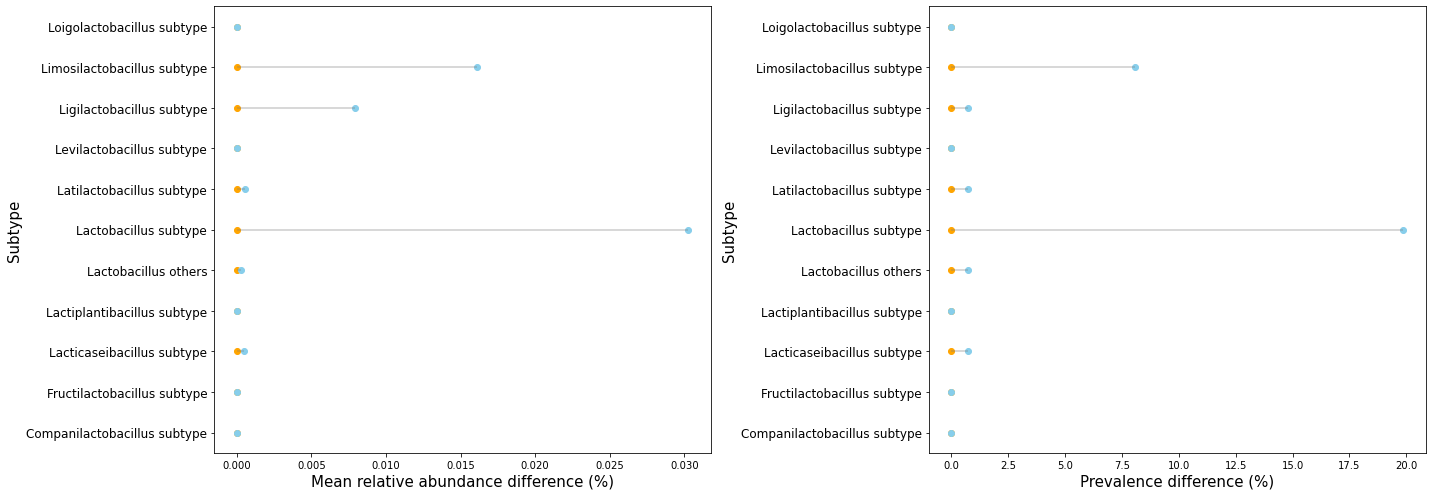

In [100]:
subtype_lollipop_chart(normal_l_df,l_df,l_d,"/home/bruce1996/data/MCI/manuscript/supplement_fig/fig_s3/subtype_lollipop_chart.svg","svg")

In [ ]:
from statannot import add_stat_annotation

l_donminent_d = dict()
for key in l_d.keys() :
    l_donminent_d[key] = normal_l_df.loc[l_d[key],:].mean(axis=1).sort_values().index[-1]

fig, axes = plt.subplots(3,4,figsize = (20,12))
for idx,ax in enumerate(axes.ravel()) :
    if idx > 10 :
        continue
    subtype = list(l_donminent_d.keys())[idx]
    species = l_donminent_d[subtype]
    df = pd.DataFrame({subtype : l_df.loc[subtype,:].values,species : normal_l_df.loc[species,:].values})
    '''
    subtype_df = pd.DataFrame({'Species' : [subtype] * l_df.shape[1],'Abundance' : l_df.loc[subtype,:].values })
    species_df = pd.DataFrame({'Species' : [species] * l_df.shape[1],'Abundance' : normal_l_df.loc[species,:].values })
    df = pd.concat([subtype_df,species_df])
    '''
    sns.scatterplot(data=df, x=species, y=subtype,palette='Set2',ax = ax)
    max_abundance = max(max(df[subtype]),max(df[species]))
    ax.set_xlim([0,max_abundance])
    ax.set_ylim([0,max_abundance])
    ax.set_title(subtype.replace('_',' '))
    ax.set_xlabel(species[3:].replace('_',' '))
    ax.set_ylabel(subtype.replace('_',' '))
    #add_stat_annotation(ax = ax,data=df, x='Species', y='Abundance',box_pairs=[(subtype, species)],test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)
plt.tight_layout()

output_dir = '/home/bruce1996/data/MCI/manuscript/normal/'
plt.savefig(output_dir + 'subtype_scatterplot.svg',dpi = 300,bbox_inches = 'tight',format='svg')
